<a href="https://colab.research.google.com/github/Lakshit-Gupta/Gen_AI_Lab/blob/master/E23CSEU0992_Assignment_5_Lakshit_Gupta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 5: Baseline CNN for Image-to-Image Translation
**Student Name:** Lakshit Gupta  
**Enrollment No:** E23CSEU0992  
**Date:** February 10, 2026


##Objective
The objective of this assignment is to design and implement a baseline encoder-decoder Convolutional Neural Network (CNN) for paired image-to-image translation. The model is trained using reconstruction loss (MSE/L1) to analyze how pixel-wise loss functions affect output quality, resulting in blurry translated images.


In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

transform_input = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

transform_target = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

class PairedCIFAR10(torch.utils.data.Dataset):
    def __init__(self, train=True):
        self.dataset = torchvision.datasets.CIFAR10(
            root="./data",
            train=train,
            download=True
        )

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        img, _ = self.dataset[idx]
        x = transform_input(img)
        y = transform_target(img)   # ground truth
        return x, y


In [2]:
import torch.nn as nn

class EncoderDecoder(nn.Module):
    def __init__(self):
        super().__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, 4, 2, 1),   # 32 → 16
            nn.ReLU(),
            nn.Conv2d(64, 128, 4, 2, 1), # 16 → 8
            nn.ReLU(),
            nn.Conv2d(128, 256, 4, 2, 1),# 8 → 4
            nn.ReLU(),
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(256, 128, 4, 2, 1), # 4 → 8
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, 4, 2, 1),  # 8 → 16
            nn.ReLU(),
            nn.ConvTranspose2d(64, 3, 4, 2, 1),    # 16 → 32
            nn.Tanh()  # output in [-1, 1]
        )

    def forward(self, x):
        z = self.encoder(x)
        return self.decoder(z)


In [3]:
from torch.utils.data import DataLoader

device = "cuda" if torch.cuda.is_available() else "cpu"

dataset = PairedCIFAR10(train=True)
loader = DataLoader(dataset, batch_size=128, shuffle=True)

model = EncoderDecoder().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=2e-4)

# Choose ONE:
criterion = nn.MSELoss()   # smoother, blurrier
# criterion = nn.L1Loss()  # slightly sharper

for epoch in range(20):
    model.train()
    total_loss = 0

    for x, y in loader:
        x, y = x.to(device), y.to(device)

        optimizer.zero_grad()
        y_hat = model(x)
        loss = criterion(y_hat, y)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {total_loss/len(loader):.4f}")


100%|██████████| 170M/170M [00:02<00:00, 73.9MB/s]


Epoch 1, Loss: 0.0552
Epoch 2, Loss: 0.0199
Epoch 3, Loss: 0.0145
Epoch 4, Loss: 0.0115
Epoch 5, Loss: 0.0097
Epoch 6, Loss: 0.0083
Epoch 7, Loss: 0.0074
Epoch 8, Loss: 0.0067
Epoch 9, Loss: 0.0062
Epoch 10, Loss: 0.0058
Epoch 11, Loss: 0.0054
Epoch 12, Loss: 0.0051
Epoch 13, Loss: 0.0048
Epoch 14, Loss: 0.0045
Epoch 15, Loss: 0.0043
Epoch 16, Loss: 0.0040
Epoch 17, Loss: 0.0038
Epoch 18, Loss: 0.0037
Epoch 19, Loss: 0.0035
Epoch 20, Loss: 0.0033


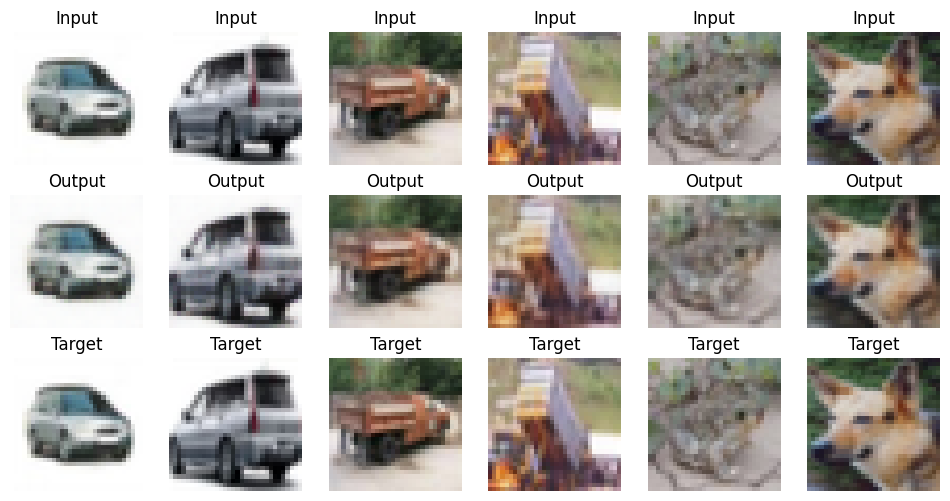

In [4]:
import matplotlib.pyplot as plt

model.eval()
x, y = next(iter(loader))
x = x.to(device)

with torch.no_grad():
    y_hat = model(x)

def denorm(img):
    return (img * 0.5 + 0.5).clamp(0, 1)

fig, axs = plt.subplots(3, 6, figsize=(12, 6))

for i in range(6):
    axs[0, i].imshow(denorm(x[i]).permute(1,2,0).cpu())
    axs[0, i].set_title("Input")

    axs[1, i].imshow(denorm(y_hat[i]).permute(1,2,0).cpu())
    axs[1, i].set_title("Output")

    axs[2, i].imshow(denorm(y[i]).permute(1,2,0).cpu())
    axs[2, i].set_title("Target")

for ax in axs.flatten():
    ax.axis("off")

plt.show()


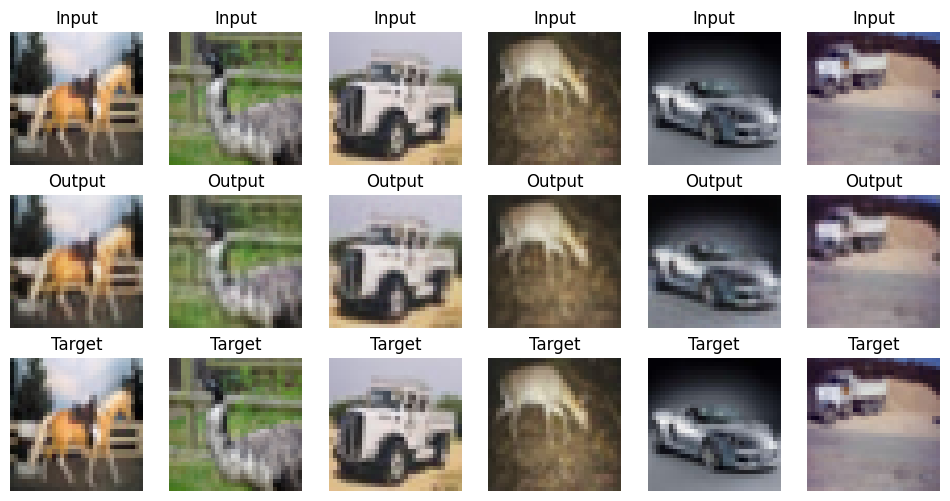

In [5]:
import matplotlib.pyplot as plt

model.eval()
x, y = next(iter(loader))
x = x.to(device)

with torch.no_grad():
    y_hat = model(x)

def denorm(img):
    return (img * 0.5 + 0.5).clamp(0, 1)

fig, axs = plt.subplots(3, 6, figsize=(12, 6))

for i in range(6):
    axs[0, i].imshow(denorm(x[i]).permute(1,2,0).cpu())
    axs[0, i].set_title("Input")

    axs[1, i].imshow(denorm(y_hat[i]).permute(1,2,0).cpu())
    axs[1, i].set_title("Output")

    axs[2, i].imshow(denorm(y[i]).permute(1,2,0).cpu())
    axs[2, i].set_title("Target")

for ax in axs.flatten():
    ax.axis("off")

plt.show()
